In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import skimage
from skimage.color import rgb2gray
from skimage import io
import pywt

In [2]:
# convert the image into gray scale
def convert_into_gray_scale(image):
    if(len(image.shape)==2):
        return image
    
    elif(len(image.shape)==3):    
        [w ,h, c] = image.shape
        if(c==1):
            return image
        elif(c==3):
            gray_scale_image = rgb2gray(image) 
            # Mind it skimage use this formula for RGB2GRAY transformation: Y = 0.2125*R + 0.7154*G + 0.0721*B
            # Normal Averege also can be used. Y = (R + G + B)/3
            #gray_scale_image = (image[:,:,0] + image[:,:,1] + image[:,:,2])/3
            # If you want to use OpenCV library then use this code
            #gray_scale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            
            return gray_scale_image
    else:
        print("Something is wrong with the image")
    

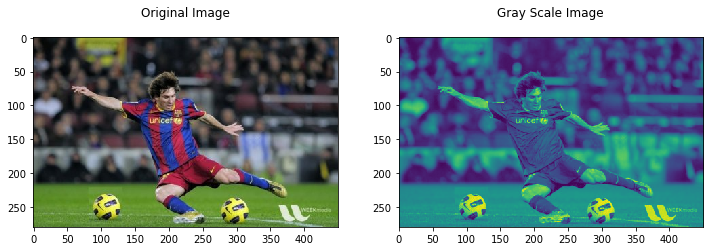

In [3]:
# bring the image
image_name = 'messi.jpg'
img = io.imread(image_name)
gray_img = convert_into_gray_scale(img)
fig, axes = plt.subplots(1,2, figsize=(12,12))
ax = axes.ravel()
ax[0].imshow(img)
ax[1].imshow(gray_img)
ax[0].set_title('Original Image\n')
ax[1].set_title('Gray Scale Image\n')
plt.show()

In [4]:
def wavelet_transform(image, wavelet_type='haar'):
    LL, (LH, HL, HH) = pywt.dwt2(image, wavelet_type)
    
    return LL, LH, HL, HH
    

  
                 |---------|----------|
                 |         |
                 |   LL    |    HL
                 |         |
                 |---------|-----------|
                 |         |
                 |   LH    |    HH
                 |         |
                 |---------|-----------|
                 
                 
     

### Algoritham of Wavelet Compression

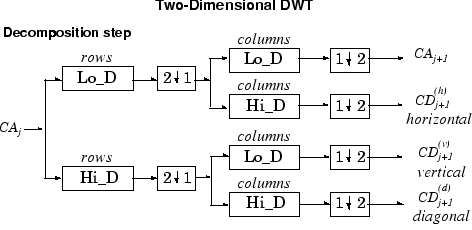

Image Credit: https://www.mathworks.com/help/wavelet/ref/ref_0131x.png

In [5]:
def show_wavelet_transformed_images(LL, LH, HL, HH):
    fig, axes = plt.subplots(2,2, figsize=(8,8))
    ax = axes.ravel()
    ax[0].imshow(LL)
    ax[1].imshow(LH)
    ax[2].imshow(HL)
    ax[3].imshow(HH)
    ax[0].set_title("Approximation")
    ax[1].set_title("Horizontal")
    ax[2].set_title("Vertical")
    ax[3].set_title("Diagonal")
    plt.show()

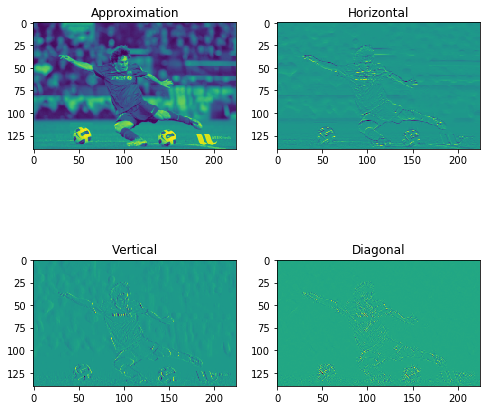

In [6]:
LL, LH, HL, HH = wavelet_transform(gray_img)
show_wavelet_transformed_images(LL, LH, HL, HH)

### 2 times transformation

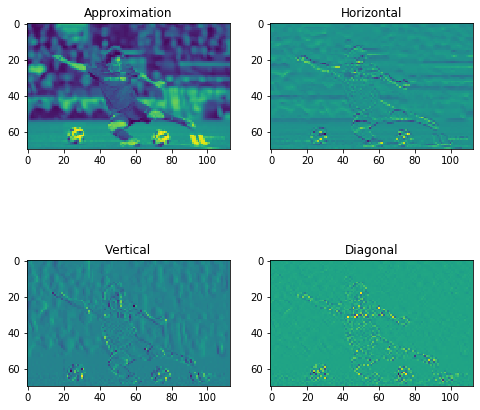

In [7]:
LL2, LH2, HL2, HH2 = wavelet_transform(LL)
show_wavelet_transformed_images(LL2, LH2, HL2, HH2)

# Inverse Wavelet Transform

In [8]:
def inverse_wavelet_transform(LL, LH, HL, HH,wavelet_type='haar'):
    coff = LL, (LH, HL, HH)
    reconstructed_image = pywt.idwt2(coff, wavelet_type)
    
    return reconstructed_image

Lossy conversion from float64 to uint8. Range [0.0, 1.9031064705882357]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.5854170588235295, 0.5242045098039216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.5493296078431376, 0.468307843137255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.3235970588235294, 0.21583156862745104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.036855784313725506, 3.754355000000001]. Convert image to uint8 prior to saving to suppress this warning.


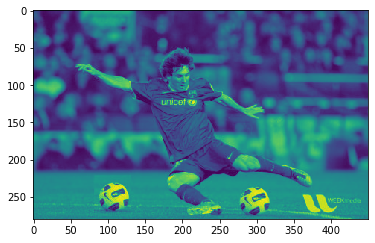

In [9]:
plt.imshow(inverse_wavelet_transform(LL, LH, HL, HH))
io.imsave("LL.png",LL)
io.imsave("LH.png",LH)
io.imsave("HL.png",HL)
io.imsave("HH.png",HH)
io.imsave("LL2.png",LL2)

In [10]:
import os
org_size = os.path.getsize(image_name)
compressed_size = os.path.getsize("LL.png")
print("Original Size: ",org_size, "Bytes"," Compressed Size: ", compressed_size,"Bytes")

Original Size:  27080 Bytes  Compressed Size:  19582 Bytes


In [11]:
print("Compression percentage: ",((org_size - compressed_size)/org_size)*100,"%")

Compression percentage:  27.68833087149188 %


In [12]:
compressed_size2 = os.path.getsize("LL2.png")
print("Compressed size after 2 times transformation: ",compressed_size2, "Bytes")
print("Compression percentage: ",((org_size - compressed_size2)/org_size)*100,"%")

Compressed size after 2 times transformation:  5846 Bytes
Compression percentage:  78.41211225997046 %


In [13]:
def wavlet_transform_rgb(image, wavelet_type = "haar"):
    r_ch = image[:,:,0]
    g_ch = image[:,:,1]
    b_ch = image[:,:,2]
    
    r_LL,_ = pywt.dwt2(r_ch, wavelet_type)
    g_LL,_ = pywt.dwt2(g_ch, wavelet_type)
    b_LL,_ = pywt.dwt2(b_ch, wavelet_type)
    
    rgb_LL = np.dstack((r_LL, g_LL, b_LL))
    
    
    # Simmilarly we can extract other features
    
    return rgb_LL

In [14]:
rgb_LL = wavlet_transform_rgb(img)


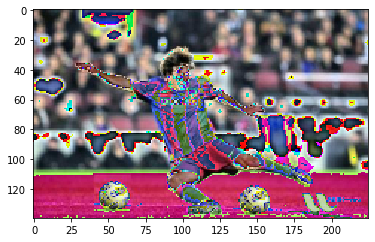

In [17]:
plt.imshow(np.uint8(rgb_LL))